# Local LLM example

Prerequisites:
- Download Ollama client: https://ollama.com/download 
- Install python Ollama package: `pip install ollama`
- Load two models:
    - llama3.2 for text processing: `ollama run llama3.2:3b`
    - llama3.2-vision for image processing: `ollama run llama3.2-vision`

Optional:
- Create a new conda environment with python3.11
  - `conda create -n ollama python=3.11`
- Install open-webui platform: https://github.com/open-webui/open-webui
- Launch open-webui in terminal: `open-webui serve`

In [2]:
import ollama

## Basic generation

In [3]:
response = ollama.generate(model='llama3.2:3b', prompt='Why is the sky blue?')

In [4]:
response.dict()

{'model': 'llama3.2:3b',
 'created_at': '2025-04-10T18:44:37.544567Z',
 'done': True,
 'done_reason': 'stop',
 'total_duration': 8015347292,
 'load_duration': 1182052708,
 'prompt_eval_count': 31,
 'prompt_eval_duration': 985000000,
 'eval_count': 431,
 'eval_duration': 5846000000,
 'response': "The sky appears blue because of a phenomenon called scattering, which occurs when sunlight interacts with the tiny molecules of gases in the Earth's atmosphere. Here's a simplified explanation:\n\n1. **Sunlight enters the Earth's atmosphere**: When sunlight enters the atmosphere, it consists of a spectrum of colors, including all the colors of the visible light spectrum (red, orange, yellow, green, blue, indigo, and violet).\n2. **Scattering occurs**: As sunlight travels through the atmosphere, it encounters tiny molecules of gases such as nitrogen (N2) and oxygen (O2). These molecules scatter the shorter (blue) wavelengths of light more than the longer (red) wavelengths.\n3. **Blue light is sc

In [5]:
print(response['response'])

The sky appears blue because of a phenomenon called scattering, which occurs when sunlight interacts with the tiny molecules of gases in the Earth's atmosphere. Here's a simplified explanation:

1. **Sunlight enters the Earth's atmosphere**: When sunlight enters the atmosphere, it consists of a spectrum of colors, including all the colors of the visible light spectrum (red, orange, yellow, green, blue, indigo, and violet).
2. **Scattering occurs**: As sunlight travels through the atmosphere, it encounters tiny molecules of gases such as nitrogen (N2) and oxygen (O2). These molecules scatter the shorter (blue) wavelengths of light more than the longer (red) wavelengths.
3. **Blue light is scattered in all directions**: The blue light is scattered in all directions by the gas molecules, which means it travels in every direction except directly downward. This is known as Rayleigh scattering, named after the British physicist Lord Rayleigh, who first described the phenomenon in the late 19

## Chat

Message history acts as a simple memory bank for the model. 

In [6]:
messages = ['What is my name?', 'My name is Dima', 'What is my name?']

from ollama import ChatResponse

message_history = []

for message in messages:
  message_history.append({
      'role': 'user',
      'content': message,
    })
  response: ChatResponse = ollama.chat(model='llama3.2:3b', messages=message_history)
  message_history.append({
      'role': 'assistant',
      'content': response.message.content,
    })
  print(message)
  print(response.message.content)
  print('---')


What is my name?
I don't have any information about you, so I don't know your name. We just started our conversation, and I don't have any personal data or context about you. Would you like to tell me your name?
---
My name is Dima
Hello Dima! It's nice to meet you. Is there something I can help you with or would you like to chat?
---
What is my name?
Déjà vu, Dima! As we discussed earlier, your name is Dima.
---


In [7]:
message_history

[{'role': 'user', 'content': 'What is my name?'},
 {'role': 'assistant',
  'content': "I don't have any information about you, so I don't know your name. We just started our conversation, and I don't have any personal data or context about you. Would you like to tell me your name?"},
 {'role': 'user', 'content': 'My name is Dima'},
 {'role': 'assistant',
  'content': "Hello Dima! It's nice to meet you. Is there something I can help you with or would you like to chat?"},
 {'role': 'user', 'content': 'What is my name?'},
 {'role': 'assistant',
  'content': 'Déjà vu, Dima! As we discussed earlier, your name is Dima.'}]

## Wikipedia text summary

In [8]:
import wikipedia

wiki_page = wikipedia.page('Oura Health')
wiki_page_text = wiki_page.content
print(wiki_page_text)

Oura Health Ltd (natively Oura Health Oy) is a Finnish health technology company, known for the Oura Ring (stylized Ōura), a smart ring used to track sleep and physical activity. The company was founded in 2013 by Petteri Lahtela, Kari Kivelä, and Markku Koskela. Harpreet Singh Rai was the CEO from 2018 until 2021, when he was replaced on an interim basis by Michael Chapp. In 2022, Tom Hale was appointed CEO. The company is headquartered in Oulu, Finland, with other locations in Helsinki, Finland, and San Francisco, United States. The company raised its initial US$2.3 million seed funding in 2015 led by Lifeline Ventures, introduced the first-generation ring via Kickstarter in 2016 and launched the ring at the Slush tech conference in 2017.
In 2020, Oura Health received the 'Best Consumer Wellness Company' award from the UCSF Digital Health Awards and Time magazine's "100 Best Inventions of 2020" mentioning especially its COVID-19-related partnership with NBA. Oura announced Series C f

## Unstructured summary example

In [9]:
response = ollama.generate(
    model='llama3.2:3b',
    prompt=f'Summarize this text: {wiki_page_text}. Use at most 3 sentences. Be concise.',
)
print(response['response'])

Here is a summary of the text:

Oura Health Ltd is a Finnish health technology company founded in 2013, known for its smart ring that tracks sleep and physical activity. The company has raised significant funding and partnered with various organizations, including Gucci and Equinox, to launch new products. Oura's products have received praise for innovation, but also criticism for accuracy issues, particularly with workout heart rate measurement and the introduction of a membership fee program.


### Hallucination example

In [10]:
response = ollama.generate(
    model='llama3.2:3b',
    prompt=f'Who are the founders of Oura Health?',
)
print(response['response'])

The founders of Oura Health are Eero Aarnio, and Ville Pumppila.


### And now actual founders as model gets wiki page context

In [11]:
response = ollama.generate(
    model='llama3.2:3b',
    prompt=f'Carefully read this wiki page: {wiki_page_text}. Who are the founders of Oura Health? Reply in one sentence.',
)
print(response['response'])

The founders of Oura Health Ltd are Petteri Lahtela, Kari Kivelä, and Markku Koskela.


## Structured output example

Using Pydantic we can force the model to adhere to a specific output format.

In [13]:
from pydantic import BaseModel

class CompanyInfo(BaseModel):
    name: str
    foundation_year: str
    founders: list[str]
    headquarters: str

In [14]:
system_prompt = """
Parse the information from a Wikipedia article about a company and fill out the required JSON schema accurately, 
ensuring no hallucination or generation of false information. 

# Steps

1. **Read and Understand the Article**: Carefully read the Wikipedia article about the specific company to grasp all relevant information.
2. **Extract Key Data**: Identify and extract only required fields. 
3. **Verify Information**: Cross-verify the extracted data within the article to ensure accuracy. 
4. **Structure Data**: Organize the information into the provided JSON schema format.

# Output Format

- Present the extracted information in the specified JSON format.
- For unknown or missing pieces of information, represent them with -1.

# Notes

- Maintain high accuracy and avoid generating facts not present in the article.
- Ensure that all necessary fields in the JSON schema are accounted for, even if they require -1 values.

Extract structured information about a company from the provided text. Return a JSON object with the following fields:

 * name: str
 * foundation_year: str
 * founders: list[str]
 * headquarters: str

# Rules:

Do not hallucinate; only extract data from the provided text.
"""

response = ollama.chat(
    messages=[
        {
            'role': 'system',
            'content': system_prompt
        },
        {
            'role': 'user',
            'content': wiki_page_text
        }
    ],
    model='llama3.2:3b',
    format=CompanyInfo.model_json_schema(),
    options = {
        'temperature': 0.1
    })

print(response.message.content)

{
  "name": "Oura Health Ltd",
  "foundation_year": "2013",
  "founders": [
    "Petteri Lahtela",
    "Kari Kivelä",
    "Markku Koskela"
  ],
  "headquarters": "Oulu, Finland"
}


## Multimodal example: llama3.2-vision

Let's analyze some images and build the best app of all times: hotdog or not dog.

In [15]:
import base64
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

def show_images(original_path: str, resized_path: str):
    original_img = Image.open(original_path)
    resized_img = Image.open(resized_path)

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    ax[0].imshow(np.array(original_img))
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    ax[1].imshow(np.array(resized_img))
    ax[1].set_title('Resized Image')
    ax[1].axis('off')

    plt.show()

def encode_image(image_path: str) -> str:
    """Encode an image to base64 string."""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
    
def resize_image(image_path: str, size: tuple) -> Image.Image:
    """Resize an image to the specified size."""
    with Image.open(image_path) as img:
        resized_img = img.resize(size)
        return resized_img

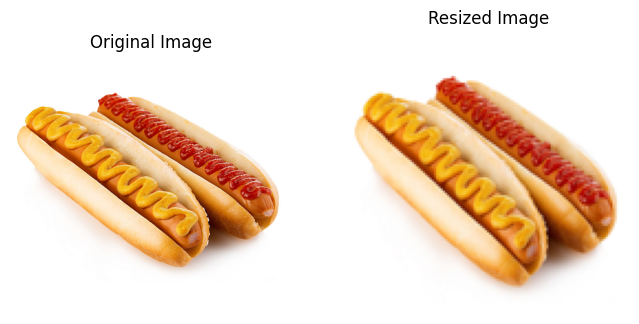

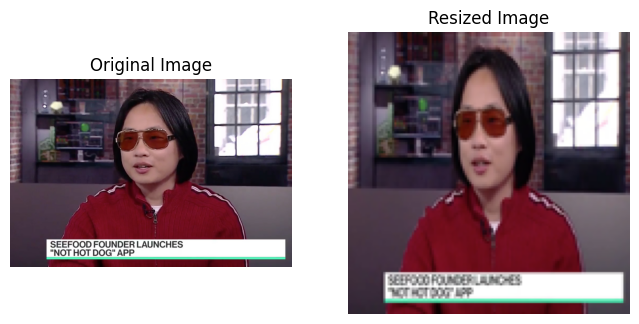

In [20]:
image_names = ['hotdog', 'nothotdog']

for name in image_names:
    image_path_original = f"../data/{name}.png"
    image_path_resized = f"../data/{name}_resized.png"

    img = Image.open(image_path_original)
    img_resized = img.resize((128, 128)) # we can aggressively compress the image

    img_resized.save(image_path_resized)

    # Getting the base64 string
    base64_image = encode_image(image_path_resized)
    show_images(image_path_original, image_path_resized)

In [17]:
class HotdogNotHotdog(BaseModel):
    is_hotdog: bool

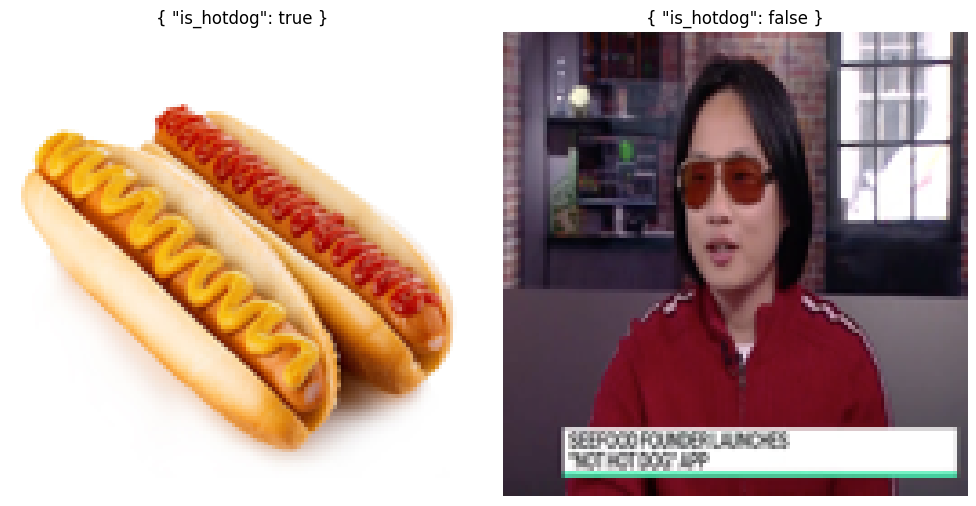

In [21]:
system_prompt = """
Analyze the image and determine if it contains a hotdog or not.
If it does, return true. If it doesn't, return false.
"""
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, image_name in enumerate(image_names):
    image_path = f"../data/{image_name}_resized.png"
    base64_image = encode_image(image_path)

    # Display the image
    img = Image.open(image_path)

    response = ollama.chat(
        messages=[
            {
                'role': 'system',
                'content': system_prompt
            },
            {
                'role': 'user',
                'images': [base64_image]
            }
        ],
        model='llama3.2-vision',
        format=HotdogNotHotdog.model_json_schema()
        )

    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(response.message.content, fontsize=12)

plt.tight_layout()
plt.show()

## One more example

In [22]:
class MealInfo(BaseModel):
    title: str
    main_ingredients: list[str]

In [23]:
system_prompt = """
Parse the image with a meal and fill in JSON schema accurately, ensuring no hallucination or generation of false information. 

Extract structured information about a meal from the provided image. Return a JSON object with the following fields:

 * title: str, the name of the meal. Keep it short and concise.
 * main_ingredients: list[str], a list of ingredients used in the meal.

# Rules:
Do not hallucinate; only extract data from the provided image.
"""

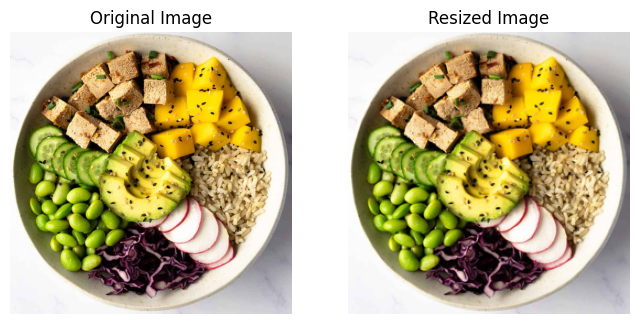

{ "title": "Tofu Bowl", "main_ingredients": ["Tofu", "Avocado", "Mango", "Brown Rice"] }


In [24]:
name = 'poke'

image_path_original = f"../data/{name}.png"
image_path_resized = f"../data/{name}_resized.png"

img = Image.open(image_path_original)
img_resized = img.resize((256, 256))

img_resized.save(image_path_resized)

# Getting the base64 string
base64_image = encode_image(image_path_resized)
show_images(image_path_original, image_path_resized)

response = ollama.chat(
    messages=[
        {
            'role': 'system',
            'content': system_prompt
        },
        {
            'role': 'user',
            'images': [base64_image]
        }
    ],
    model='llama3.2-vision',
    format=MealInfo.model_json_schema()
    )
print(response.message.content)